<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_ML/blob/main/Book_Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTrees

## Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

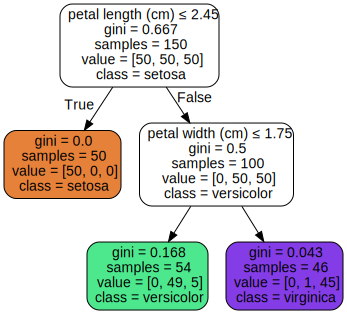

In [2]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf,
                           feature_names=["petal length (cm)", "petal width (cm)"],
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           out_file=None)
graph = graphviz.Source(dot_data)
graph

In [3]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [4]:
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')

In [5]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [6]:
X_moons_test, y_moons_test = make_moons(n_samples=1000,
                                        noise=0.2,
                                        random_state=42)
print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.901
0.918


## Regression

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

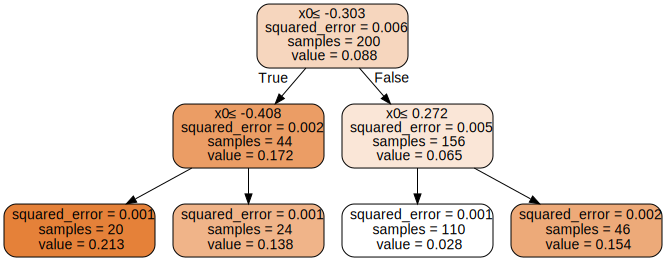

In [8]:
dot_data = export_graphviz(tree_reg,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           out_file=None)
graph = graphviz.Source(dot_data)
graph

## Axis Orientation

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Exercises

1. log2(1000000) ~= 20, beacuse very often these trees are balanced.
2. Generally Gini Imputiry of a node is lower that it's parent impurity.
3. If it is overfitting it is good idea to descrease max_depth.
4. Not neccesarily, decision trees are not sensitive to data scale.
5. Training: O(m * n * log2(m) ), so 10 times more instances will result in 12 times longer training.
6. Twice as much.


## Exercise 7

In [23]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

moons_dataset = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(moons_dataset[0], moons_dataset[1], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid,
                    verbose=3,
                    cv=3)
grid.fit(X_train, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV 2/3] END max_depth=1, max_leaf_nodes=34, min_samples_split=3;, score=0.772 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=34, min_samples_split=3;, score=0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=34, min_samples_split=4;, score=0.785 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=34, min_samples_split=4;, score=0.772 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=34, min_samples_split=4;, score=0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=35, min_samples_split=2;, score=0.785 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=35, min_samples_split=2;, score=0.772 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=35, min_samples_split=2;, score=0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=35, min_samples_split=3;, score=0.785 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=35, min_samp

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [37]:
grid.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [38]:
best_tree = grid.best_estimator_
best_tree.score(X_test, y_test)

0.8465

## Exercise 8

In [76]:
from sklearn.model_selection import ShuffleSplit

moons = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(moons[0], moons[1], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [77]:
models = []
n_instances = 100
random_shuffle = ShuffleSplit(n_splits=1000, test_size=len(X_train) - n_instances)

for i, (train_index, test_index) in enumerate(random_shuffle.split(X_train)):
  model = DecisionTreeClassifier(max_depth=2,
                                 max_leaf_nodes=4,
                                 min_samples_split=2)
  train_data = X_train[train_index]
  test_data = y_train[train_index]
  model.fit(train_data, test_data)
  models.append(model)

In [78]:
models[0].predict([X_test[10]])[0]

0

In [79]:
len(models), len(X_test)

(1000, 2000)

In [80]:
final_predictions = []
for i in range(len(X_test)):
  test_sample = X_test[i]
  test_target = y_test[i]
  predictions = []
  final_predictions.append([])
  print(f"Instance number {i}")
  for model in models:
    final_predictions[i].append(model.predict([test_sample])[0])

Instance number 0
Instance number 1
Instance number 2
Instance number 3
Instance number 4
Instance number 5
Instance number 6
Instance number 7
Instance number 8
Instance number 9
Instance number 10
Instance number 11
Instance number 12
Instance number 13
Instance number 14
Instance number 15
Instance number 16
Instance number 17
Instance number 18
Instance number 19
Instance number 20
Instance number 21
Instance number 22
Instance number 23
Instance number 24
Instance number 25
Instance number 26
Instance number 27
Instance number 28
Instance number 29
Instance number 30
Instance number 31
Instance number 32
Instance number 33
Instance number 34
Instance number 35
Instance number 36
Instance number 37
Instance number 38
Instance number 39
Instance number 40
Instance number 41
Instance number 42
Instance number 43
Instance number 44
Instance number 45
Instance number 46
Instance number 47
Instance number 48
Instance number 49
Instance number 50
Instance number 51
Instance number 52
Ins

In [81]:
final_predictions = np.array(final_predictions)
final_predictions.shape

(2000, 1000)

In [82]:
from scipy.stats import mode

mode_predictions = []
for preds in final_predictions:
  mode_value = mode(preds)
  mode_predictions.append(mode_value[0])
mode_predictions = np.array(mode_predictions)
mode_predictions.shape

(2000,)

In [83]:
mode_predictions

array([0, 0, 1, ..., 1, 0, 1])

In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, mode_predictions))

0.8575
